In [2]:
# Imports
import os
import sys
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import PIL
from PIL import Image
import pickle
import tifffile
import torch


sys.path.append(os.path.abspath('..'))
from scripts.plotting import PlotController
from utils import move_data_to_device, move_dict_to_cpu


In [3]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

# Plotting Jaccard index vs density for different snrs

In [4]:
# Load dicts
with open(r"D:\zeiss\Desktop\coding\Hilger\bachelor\measurements\overnight_measurements\score07\d_2snr.pkl", "rb") as f:
    snr2_density = pickle.load(f)
    snr2_density = move_dict_to_cpu(snr2_density)

with open(r"D:\zeiss\Desktop\coding\Hilger\bachelor\measurements\overnight_measurements\score07\d_3snr.pkl", "rb") as f:
    snr3_density = pickle.load(f)
    snr3_density = move_dict_to_cpu(snr3_density)

with open(r"D:\zeiss\Desktop\coding\Hilger\bachelor\measurements\overnight_measurements\score07\d_5snr.pkl", "rb") as f:
    snr5_density = pickle.load(f)
    snr5_density = move_dict_to_cpu(snr5_density)

with open(r"D:\zeiss\Desktop\coding\Hilger\bachelor\measurements\overnight_measurements\score07\d_8snr.pkl", "rb") as f:
    snr8_density = pickle.load(f)
    snr8_density = move_dict_to_cpu(snr8_density)

In [5]:
metric = 'mean_ji'

ds2 = np.array(list(snr2_density.keys()))
jis2 = np.array([snr2_density[density][metric] for density in ds2])
ds3 = np.array(list(snr3_density.keys()))
jis3 = np.array([snr3_density[density][metric] for density in ds3])
ds5 = np.array(list(snr5_density.keys()))
jis5 = np.array([snr5_density[density][metric] for density in ds5])
ds8 = np.array(list(snr8_density.keys()))
jis8 = np.array([snr8_density[density][metric] for density in ds8])

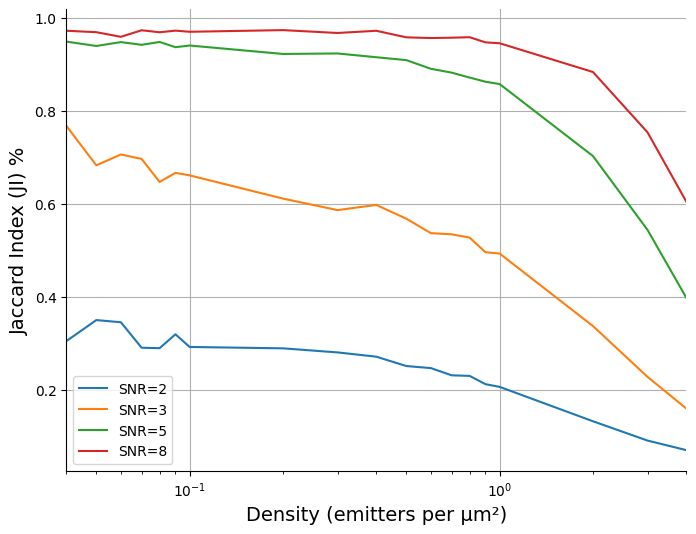

In [11]:
# Plotting ji vs density
metric = 'mean_ji'

ds2 = np.array(list(snr2_density.keys()))
jis2 = np.array([snr2_density[density][metric] for density in ds2])
ds3 = np.array(list(snr3_density.keys()))
jis3 = np.array([snr3_density[density][metric] for density in ds3])
ds5 = np.array(list(snr5_density.keys()))
jis5 = np.array([snr5_density[density][metric] for density in ds5])
ds8 = np.array(list(snr8_density.keys()))
jis8 = np.array([snr8_density[density][metric] for density in ds8])

plt.figure(figsize=(8, 6), dpi=100)
plt.semilogx(ds2, jis2, linestyle='-', label='SNR=2')
plt.semilogx(ds3, jis3, linestyle='-', label='SNR=3')
plt.semilogx(ds5, jis5, linestyle='-', label='SNR=5')
plt.semilogx(ds8, jis8, linestyle='-', label='SNR=8')


plt.xlabel('Density (emitters per μm²)', fontsize=14)
plt.ylabel('Jaccard Index (JI) %', fontsize=14)
#plt.title(' vs Density')
plt.xlim(0.04, 4)
plt.grid(True)
plt.legend()
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.show()

In [11]:
for density, value in snr8_density.items():
    print(f'Density: {density}, SNR=8, {metric}: {value[metric]}, stdji: {value['std_ji']}')

Density: 0.04, SNR=8, mean_ji: 0.9025, stdji: 0.21050699381361285
Density: 0.05, SNR=8, mean_ji: 0.9358333333333333, stdji: 0.15162163556158592
Density: 0.060000000000000005, SNR=8, mean_ji: 0.9415000000000001, stdji: 0.1414768990434939
Density: 0.07, SNR=8, mean_ji: 0.9291666666666667, stdji: 0.15710414686749352
Density: 0.08000000000000002, SNR=8, mean_ji: 0.9592222222222222, stdji: 0.12161774764897547
Density: 0.09000000000000001, SNR=8, mean_ji: 0.9610555555555556, stdji: 0.11472590793110893
Density: 0.1, SNR=8, mean_ji: 0.9601269841269842, stdji: 0.11724530513936786
Density: 0.2, SNR=8, mean_ji: 0.9743796296296295, stdji: 0.06691428486656935
Density: 0.30000000000000004, SNR=8, mean_ji: 0.9631196581196582, stdji: 0.07567220180372876
Density: 0.4, SNR=8, mean_ji: 0.9545446623093682, stdji: 0.06830768110135896
Density: 0.5, SNR=8, mean_ji: 0.951801304975218, stdji: 0.06822690323939658
Density: 0.6, SNR=8, mean_ji: 0.9486422330755664, stdji: 0.06440835913806903
Density: 0.70000000000

In [22]:
for key in snr2_density[1].keys():
            print(key)

mean_precision
mean_recall
mean_f1
mean_ji
mean_loc_error
avg_std_loc_error
mean_mean_squared_error
avg_std_mean_squared_error
std_precision
std_recall
std_f1
std_ji
std_loc_error
std_mean_squared_error


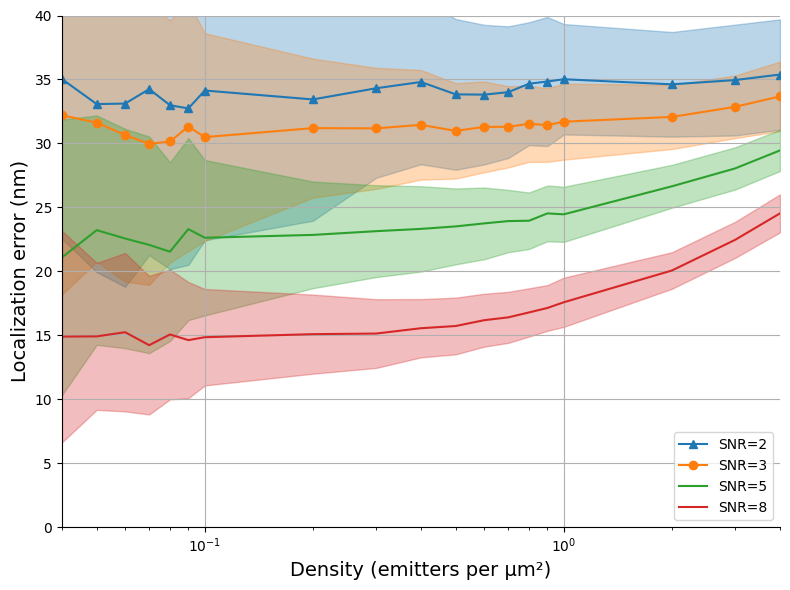

In [18]:
# Plot mean localization error vs density for different SNRs
metric = 'mean_loc_error'
stdmetric = 'std_loc_error'

# Extract mean and std values for each SNR
ds2 = np.array(list(snr2_density.keys()), dtype=float)
jis2 = np.array([snr2_density[density][metric] for density in ds2])*100
std2 = np.array([snr2_density[density][stdmetric] for density in ds2])*100

ds3 = np.array(list(snr3_density.keys()), dtype=float)
jis3 = np.array([snr3_density[density][metric] for density in ds3])*100
std3 = np.array([snr3_density[density][stdmetric] for density in ds3])*100

ds5 = np.array(list(snr5_density.keys()), dtype=float)
jis5 = np.array([snr5_density[density][metric] for density in ds5]) *100
std5 = np.array([snr5_density[density][stdmetric] for density in ds5]) *100

ds8 = np.array(list(snr8_density.keys()), dtype=float)
jis8 = np.array([snr8_density[density][metric] for density in ds8]) *100
std8 = np.array([snr8_density[density][stdmetric] for density in ds8]) *100

# Plot lines and shaded standard deviation areas
opacity = 0.3
plt.figure(figsize=(8, 6), dpi=100)

plt.semilogx(ds2, jis2, marker='^', linestyle='-', label='SNR=2')
plt.fill_between(ds2, jis2 - std2, jis2 + std2, alpha=opacity, color='C0')

plt.semilogx(ds3, jis3, marker='o', linestyle='-', label='SNR=3')
plt.fill_between(ds3, jis3 - std3, jis3 + std3, alpha=opacity, color='C1')

plt.semilogx(ds5, jis5, linestyle='-', label='SNR=5',color='C2')
plt.fill_between(ds5, jis5 - std5, jis5 + std5, alpha=opacity, color='C2')

plt.semilogx(ds8, jis8, linestyle='-', label='SNR=8',color='C3')
plt.fill_between(ds8, jis8 - std8, jis8 + std8, alpha=opacity, color='C3')

# Add labels and grid
plt.xlabel('Density (emitters per μm²)', fontsize=14)
plt.ylabel('Localization error (nm)', fontsize=14)
plt.xlim(0.04, 4)
plt.ylim(0, 40)
plt.grid(True)
plt.legend()
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.tight_layout()
plt.show()


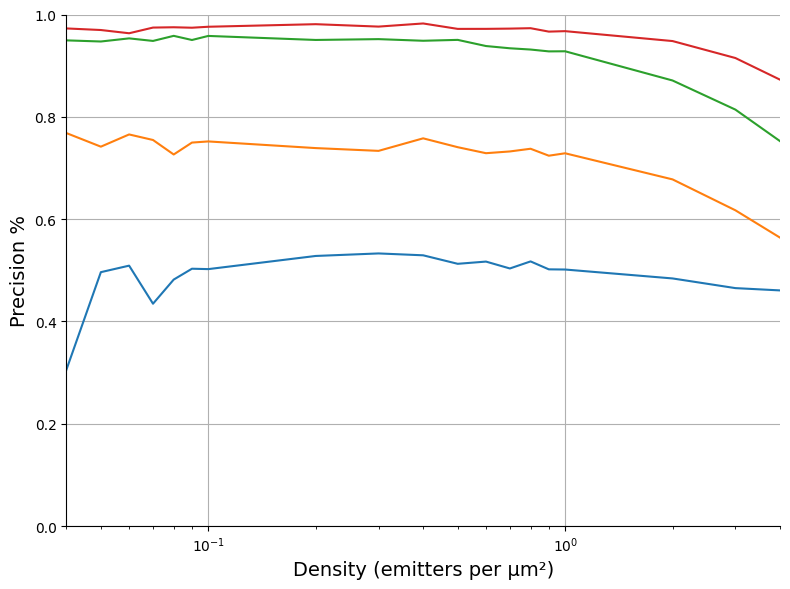

In [ ]:
metric = 'mean_precision'
stdmetric = 'std_recall'

# Extract mean and std values for each SNR
ds2 = np.array(list(snr2_density.keys()), dtype=float)
jis2 = np.array([snr2_density[density][metric] for density in ds2])
std2 = np.array([snr2_density[density][stdmetric] for density in ds2])

ds3 = np.array(list(snr3_density.keys()), dtype=float)
jis3 = np.array([snr3_density[density][metric] for density in ds3])
std3 = np.array([snr3_density[density][stdmetric] for density in ds3])

ds5 = np.array(list(snr5_density.keys()), dtype=float)
jis5 = np.array([snr5_density[density][metric] for density in ds5])
std5 = np.array([snr5_density[density][stdmetric] for density in ds5])

ds8 = np.array(list(snr8_density.keys()), dtype=float)
jis8 = np.array([snr8_density[density][metric] for density in ds8])
std8 = np.array([snr8_density[density][stdmetric] for density in ds8])

# Plot lines and shaded standard deviation areas
opacity = 0.3
plt.figure(figsize=(8, 6), dpi=100)

plt.semilogx(ds2, jis2, linestyle='-', label='SNR=2')
plt.fill_between(ds2, jis2 - std2, jis2 + std2, alpha=opacity, color='C0')

plt.semilogx(ds3, jis3, linestyle='-', label='SNR=3')
plt.fill_between(ds3, jis3 - std3, jis3 + std3, alpha=opacity, color='C1')

plt.semilogx(ds5, jis5, linestyle='-', label='SNR=5')
plt.fill_between(ds5, jis5 - std5, jis5 + std5, alpha=opacity, color='C2')

plt.semilogx(ds8, jis8, linestyle='-', label='SNR=8')
plt.fill_between(ds8, jis8 - std8, jis8 + std8, alpha=opacity, color='C3')

# Add labels and grid
plt.xlabel('Density (emitters per μm²)', fontsize=14)
plt.ylabel('Precision %', fontsize=14)
#plt.title(f'{metric} vs Density')
plt.xlim(0.04, 4)
plt.ylim(0, 1)
plt.grid(True)
#plt.legend()
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.tight_layout()
plt.show()


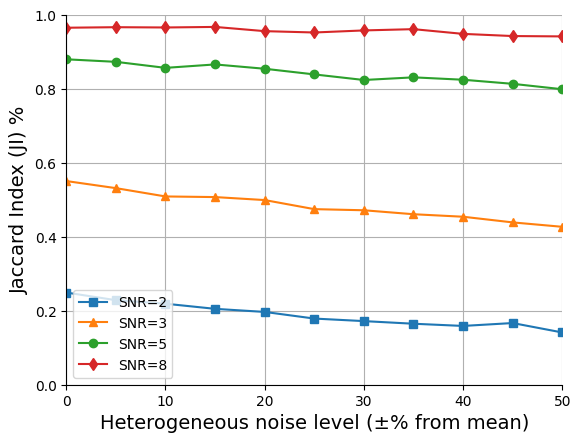

In [20]:
# Plot performance vs het. noise level
with open(r"D:\zeiss\Desktop\coding\Hilger\bachelor\measurements\overnight_measurements\score07\noise_5snr.pkl", "rb") as f:
    noisetest_snr5 = pickle.load(f)
    noisetest_snr5 = move_dict_to_cpu(noisetest_snr5)
with open(r"D:\zeiss\Desktop\coding\Hilger\bachelor\measurements\overnight_measurements\score07\noise_2snr.pkl", "rb") as f:
    noisetest_snr2 = pickle.load(f)
    noisetest_snr2 = move_dict_to_cpu(noisetest_snr2)
with open(r"D:\zeiss\Desktop\coding\Hilger\bachelor\measurements\overnight_measurements\score07\noise_3snr.pkl", "rb") as f:
    noisetest_snr3 = pickle.load(f)
    noisetest_snr3 = move_dict_to_cpu(noisetest_snr3)
with open(r"D:\zeiss\Desktop\coding\Hilger\bachelor\measurements\overnight_measurements\score07\noise_8snr.pkl", "rb") as f:
    noisetest_snr8 = pickle.load(f)
    noisetest_snr8 = move_dict_to_cpu(noisetest_snr8)

metric = 'mean_ji'
std_metric = 'std_ji'
l5 = np.array(list(noisetest_snr5.keys()))
l2 = np.array(list(noisetest_snr2.keys()))
l3 = np.array(list(noisetest_snr3.keys()))
l8 = np.array(list(noisetest_snr8.keys()))

x = np.arange(50, -1, -5)
m5 = np.array([noisetest_snr5[tuple(noise)][metric] for noise in l5])
m2 = np.array([noisetest_snr2[tuple(noise)][metric] for noise in l2])
m3 = np.array([noisetest_snr3[tuple(noise)][metric] for noise in l3])
m8 = np.array([noisetest_snr8[tuple(noise)][metric] for noise in l8])
s2 = np.array([noisetest_snr2[tuple(noise)][std_metric] for noise in l2])
s3 = np.array([noisetest_snr3[tuple(noise)][std_metric] for noise in l3])
s5 = np.array([noisetest_snr5[tuple(noise)][std_metric] for noise in l5])
s8 = np.array([noisetest_snr8[tuple(noise)][std_metric] for noise in l8])

plt.plot(x, m2, marker='s', linestyle='-',label='SNR=2')
#plt.fill_between(x, m2 - s2, m2 + s2, alpha=0.2, color='C0')
plt.plot(x, m3, marker='^', linestyle='-',label='SNR=3')
#plt.fill_between(x, m3 - s3, m3 + s3, alpha=0.2, color='C1')
plt.plot(x, m5, marker='o', linestyle='-',label='SNR=5')
#plt.fill_between(x, m5 - s5, m5 + s5, alpha=0.2, color='C2')
plt.plot(x, m8, marker='d', linestyle='-',label='SNR=8')
#plt.fill_between(x, m8 - s8, m8 + s8, alpha=0.2, color='C3')
plt.xlabel('Heterogeneous noise level (±% from mean)', fontsize=14)
plt.ylabel('Jaccard Index (JI) %', fontsize=14)
#plt.title(f'{metric} vs Density')
plt.grid(True)
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.ylim(0, 1)
plt.xlim(0, 50)
plt.legend()
plt.show()

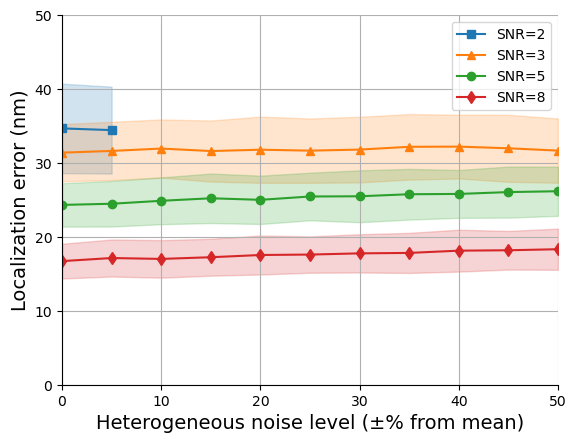

In [110]:
# Plot performance vs het. noise level
with open(r"/Users/august/Desktop/bachelor/bachelor1/measurements/draft_measurements/iou05/noisetest_5snr.pkl", "rb") as f:
    noisetest_snr5 = pickle.load(f)
    noisetest_snr5 = move_dict_to_cpu(noisetest_snr5)
with open(r"/Users/august/Desktop/bachelor/bachelor1/measurements/draft_measurements/iou05/noisetest_2snr.pkl", "rb") as f:
    noisetest_snr2 = pickle.load(f)
    noisetest_snr2 = move_dict_to_cpu(noisetest_snr2)
with open(r"/Users/august/Desktop/bachelor/bachelor1/measurements/draft_measurements/iou05/noisetest_3snr.pkl", "rb") as f:
    noisetest_snr3 = pickle.load(f)
    noisetest_snr3 = move_dict_to_cpu(noisetest_snr3)
with open(r"/Users/august/Desktop/bachelor/bachelor1/measurements/draft_measurements/iou05/noisetest_8snr.pkl", "rb") as f:
    noisetest_snr8 = pickle.load(f)
    noisetest_snr8 = move_dict_to_cpu(noisetest_snr8)

metric = 'mean_loc_error'
std_metric = 'std_loc_error'
l5 = np.array(list(noisetest_snr5.keys()))
l2 = np.array(list(noisetest_snr2.keys()))
l3 = np.array(list(noisetest_snr3.keys()))
l8 = np.array(list(noisetest_snr8.keys()))

x = np.arange(50, -1, -5)
m5 = np.array([noisetest_snr5[tuple(noise)][metric] for noise in l5]) *100
m2 = np.array([noisetest_snr2[tuple(noise)][metric] for noise in l2]) *100
m3 = np.array([noisetest_snr3[tuple(noise)][metric] for noise in l3]) *100
m8 = np.array([noisetest_snr8[tuple(noise)][metric] for noise in l8]) *100
s2 = np.array([noisetest_snr2[tuple(noise)][std_metric] for noise in l2]) *100
s3 = np.array([noisetest_snr3[tuple(noise)][std_metric] for noise in l3]) *100
s5 = np.array([noisetest_snr5[tuple(noise)][std_metric] for noise in l5]) *100
s8 = np.array([noisetest_snr8[tuple(noise)][std_metric] for noise in l8]) *100

plt.plot(x, m2, marker='s', linestyle='-',label='SNR=2')
plt.fill_between(x, m2 - s2, m2 + s2, alpha=0.2, color='C0')
plt.plot(x, m3, marker='^', linestyle='-',label='SNR=3')
plt.fill_between(x, m3 - s3, m3 + s3, alpha=0.2, color='C1')
plt.plot(x, m5, marker='o', linestyle='-',label='SNR=5')
plt.fill_between(x, m5 - s5, m5 + s5, alpha=0.2, color='C2')
plt.plot(x, m8, marker='d', linestyle='-',label='SNR=8')
plt.fill_between(x, m8 - s8, m8 + s8, alpha=0.2, color='C3')
plt.xlabel('Heterogeneous noise level (±% from mean)', fontsize=14)
plt.ylabel('Localization error (nm)', fontsize=14)
#plt.title(f'{metric} vs Density')
plt.grid(True)
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.ylim(0, 50)
plt.xlim(0, 50)
plt.legend()
plt.show()